<a href="https://colab.research.google.com/github/mafudsetiono/Analysis-Sentiment-Airline/blob/main/Analisis_Sentimen_Maskapai_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

#Goals

Menganalisis sentimen publik terhadap layanan maskapai penerbangan berdasarkan data tweet, serta memahami faktor-faktor utama yang memengaruhi opini positif maupun negatif pengguna.

Question

1. Sentiment Overview

Bagaimana distribusi sentimen (positif, netral, negatif) dari seluruh tweet?

2. Maskapai & Sentimen

Maskapai mana yang menerima tweet negatif paling banyak, dan mana yang mendapat sentimen positif lebih tinggi?

3. Keluhan Pelanggan (Negative Reason)

Apa jenis keluhan yang paling sering muncul pada tweet negatif?

4. Maskapai & Keluhan

Apakah ada maskapai tertentu yang lebih sering dikaitkan dengan jenis keluhan tertentu?

5. Tren Pola Teks (NLP Basic)

Kata atau frasa apa yang paling sering muncul dalam tweet negatif dan positif?

In [ ]:
df = pd.read_csv('/content/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.sample(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8484,568213658117005314,positive,1.0000,NaN,NaN,Delta,NaN,Bill_Faulk,NaN,0,@JetBlue thanks. I appreciate your prompt resp...,NaN,2015-02-18 17:01:07 -0800,#ManorvilleInExile,Eastern Time (US & Canada)
6151,568180264914051072,positive,0.6867,NaN,NaN,Southwest,NaN,dalyrt5,NaN,0,@SouthwestAir @Imaginedragons @beatsmusic well...,NaN,2015-02-18 14:48:26 -0800,"Nashville, TN",Arizona
8988,570297185704812545,neutral,1.0000,NaN,NaN,US Airways,NaN,EricGuster,NaN,0,@USAirways I need help about a ticket. DM me,NaN,2015-02-24 11:00:19 -0800,✈️ Birmingham ✈️ Brooklyn ✈️,Central Time (US & Canada)


In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


#Data Cleansing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# Cek Missing Value
df.isna().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


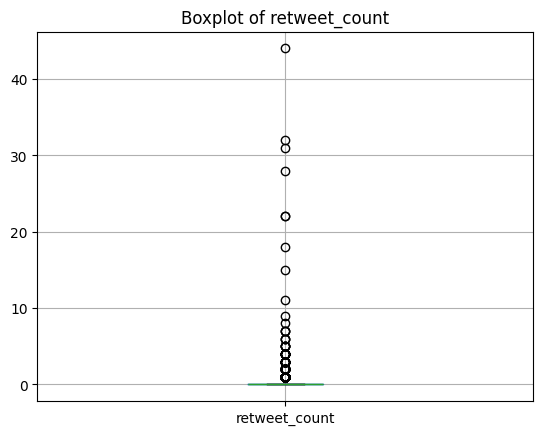

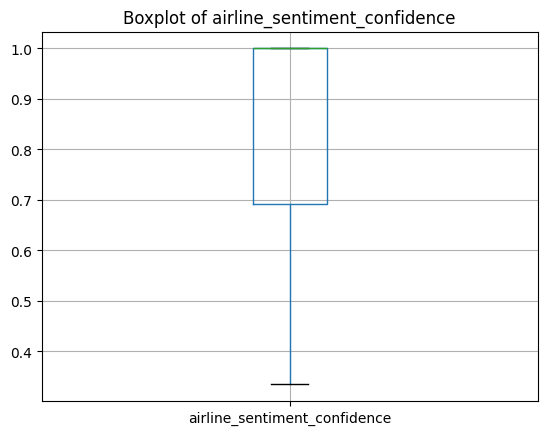

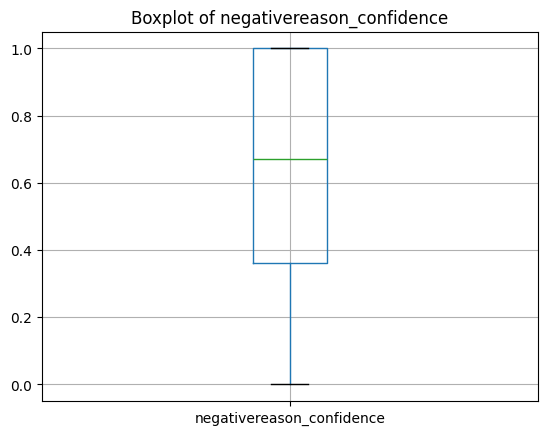

In [ ]:
# Cek outlier
num_cols = [
    "retweet_count",
    "airline_sentiment_confidence",
    "negativereason_confidence"
]

for col in num_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

Outlier hanya terdapat di retweet_count dan tidak dihapus karena mencerminkan fenomena viral yang valid, seperti tweet yang memiliki 40 retweet, itu menandakan adanya kesamaan keluhan antar customer (Related).

In [ ]:
df[df['retweet_count']>= 1]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
136,569625739231948800,positive,1.0,NaN,NaN,Virgin America,NaN,lisaptv,NaN,1,@virginamerica you ROCK for making it so I can...,NaN,2015-02-22 14:32:14 -0800,NaN,Mountain Time (US & Canada)
147,569599867716132864,positive,1.0,NaN,NaN,Virgin America,NaN,jessicajaymes,NaN,2,Always have it together!!! You're welcome! RT ...,"[33.94652852, -118.40766257]",2015-02-22 12:49:25 -0800,"hollywood, california",Pacific Time (US & Canada)
264,568929979981033472,positive,1.0,NaN,NaN,Virgin America,NaN,djchuang,NaN,1,@VirginAmerica thanks for gate checking my bag...,"[32.8454782, -96.8504585]",2015-02-20 16:27:32 -0800,"Orange County, CA",Pacific Time (US & Canada)
304,568812046747201537,negative,1.0,Lost Luggage,1.0000,Virgin America,NaN,snellbell,NaN,1,@VirginAmerica lost my luggage 4 days ago on f...,NaN,2015-02-20 08:38:54 -0800,NaN,Quito
318,568735060104511488,neutral,1.0,NaN,NaN,Virgin America,NaN,gemmabow19,NaN,2,@VirginAmerica can u help this 👸 @FreyaBevan_F...,NaN,2015-02-20 03:32:59 -0800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14426,569617808885096448,negative,1.0,Customer Service Issue,1.0000,American,NaN,ejacqui,NaN,1,"@AmericanAir no one received text alerts, auto...",NaN,2015-02-22 14:00:43 -0800,Chicago,Central Time (US & Canada)
14524,569604328153083904,negative,1.0,Late Flight,0.6849,American,NaN,farazq,NaN,1,@AmericanAir can you do anything to get #AA953...,"[40.80718573, -73.95477259]",2015-02-22 13:07:09 -0800,"New York, NY",Quito
14532,569603156927246336,negative,1.0,Flight Booking Problems,0.6964,American,NaN,JasonShaw2,NaN,2,@AmericanAir missing a full days of work thank...,NaN,2015-02-22 13:02:29 -0800,Belleville,Eastern Time (US & Canada)
14547,569601094239825920,positive,1.0,NaN,NaN,American,NaN,EricRoberts,NaN,1,Eliza &amp; I cheated on u @AmericanAir with @...,NaN,2015-02-22 12:54:18 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [ ]:
# Cek Duplicate
df['text'].duplicated().sum()


np.int64(213)

In [ ]:
#Hapus Duplicate
df = df.drop_duplicates(subset="text").reset_index(drop=True)
df['text'].duplicated().sum()

np.int64(0)

In [ ]:
df['text'].duplicated().sum()

np.int64(0)

In [ ]:
# Kolom penting yang tidak boleh kosong
required_cols = ["text", "airline", "airline_sentiment"]

display(df[required_cols].isna().sum())

,0
text,0
airline,0
airline_sentiment,0


In [ ]:
# Hapus baris yang missing pada kolom wajib
df = df.dropna(subset=required_cols).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14427 entries, 0 to 14426
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14427 non-null  int64  
 1   airline_sentiment             14427 non-null  object 
 2   airline_sentiment_confidence  14427 non-null  float64
 3   negativereason                9080 non-null   object 
 4   negativereason_confidence     10410 non-null  float64
 5   airline                       14427 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14427 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14427 non-null  int64  
 10  text                          14427 non-null  object 
 11  tweet_coord                   1003 non-null   object 
 12  tweet_created                 14427 non-null  object 
 13  t

In [ ]:
df["text"]

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
14422,@AmericanAir thank you we got on a different f...
14423,@AmericanAir leaving over 20 minutes Late Flig...
14424,@AmericanAir Please bring American Airlines to...
14425,"@AmericanAir you have my money, you change my ..."


In [ ]:
#Function clean text
def clean_text(text):
    text = text.lower()                                 # ubah ke lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) # hapus URL
    text = re.sub(r"@\w+", "", text)                    # hapus mention
    text = re.sub(r"#", "", text)                       # hapus tanda hashtag, kata tetap diambil
    text = re.sub(r"[^a-zA-Z0-9\s']", " ", text)        # hapus karakter lain
    text = re.sub(r"\s+", " ", text).strip()            # hapus spasi berlebih
    return text

In [ ]:
df["clean_text"] = df["text"].apply(clean_text)

In [ ]:
df['clean_text']

,clean_text
0,what said
1,plus you've added commercials to the experienc...
2,i didn't today must mean i need to take anothe...
3,it's really aggressive to blast obnoxious ente...
4,and it's a really big bad thing about it
...,...
14422,thank you we got on a different flight to chicago
14423,leaving over 20 minutes late flight no warning...
14424,please bring american airlines to blackberry10
14425,you have my money you change my flight and don...


In [ ]:
df["text_length"] = df["clean_text"].apply(len)
df["word_count"] = df["clean_text"].apply(lambda x: len(x.split()))

In [ ]:
df['text_length']

,text_length
0,9
1,53
2,52
3,107
4,40
...,...
14422,49
14423,135
14424,46
14425,117


In [ ]:
df["word_count"]

,word_count
0,2
1,8
2,11
3,16
4,9
...,...
14422,10
14423,22
14424,6
14425,22


#Data Manipulation

In [ ]:
# Tambah kategori
# Kolom apakah tweet negatif
df["is_negative"] = df["airline_sentiment"].apply(lambda x: 1 if x == "negative" else 0)

# Kolom apakah tweet positif
df["is_positive"] = df["airline_sentiment"].apply(lambda x: 1 if x == "positive" else 0)

# Kolom apakah netral
df["is_neutral"] = df["airline_sentiment"].apply(lambda x: 1 if x == "neutral" else 0)


In [ ]:
# Jika negativereason kosong → isi dengan "No Reason"
df["negativereason_filled"] = df["negativereason"].fillna("No Reason")

In [ ]:
# Pecah waktu tweet created
df["tweet_created"] = pd.to_datetime(df["tweet_created"])
df["date"] = df["tweet_created"].dt.date
df["hour"] = df["tweet_created"].dt.hour
df["dayofweek"] = df["tweet_created"].dt.day_name()

In [ ]:
#Hitung total tweet keseluruhan
total_tweet = df.shape[0]
print(f"Total Tweet: {total_tweet}")

Total Tweet: 14427


In [ ]:
# Hitung total tweet per airline
total_airline = df.groupby("airline").size().rename("total_tweet")
df = df.merge(total_airline, on="airline", how="left")

# Hitung jumlah negatif per airline
neg_airline = df[df["is_negative"] == 1].groupby("airline").size().rename("total_negative")
df = df.merge(neg_airline, on="airline", how="left")

# Hitung jumlah positif per airline
pos_airline = df[df["is_positive"] == 1].groupby("airline").size().rename("total_positive")
df = df.merge(pos_airline, on="airline", how="left")

# Hitung jumlah netral per airline
neu_airline = df[df["is_neutral"] == 1].groupby("airline").size().rename("total_neutral")
df = df.merge(neu_airline, on="airline", how="left")

# Hapus NaN hasil gabungan
df[["total_negative", "total_positive", "total_neutral"]] = \
    df[["total_negative", "total_positive", "total_neutral"]].fillna(0)

In [ ]:
#Persentase Sentimen
df["pct_negative"] = df["total_negative"] / df["total_tweet"]
df["pct_positive"] = df["total_positive"] / df["total_tweet"]
df["pct_neutral"] = df["total_neutral"] / df["total_tweet"]

In [ ]:
df["char_per_word"] = df["text_length"] / df["word_count"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14427 entries, 0 to 14426
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype                    
---  ------                        --------------  -----                    
 0   tweet_id                      14427 non-null  int64                    
 1   airline_sentiment             14427 non-null  object                   
 2   airline_sentiment_confidence  14427 non-null  float64                  
 3   negativereason                9080 non-null   object                   
 4   negativereason_confidence     10410 non-null  float64                  
 5   airline                       14427 non-null  object                   
 6   airline_sentiment_gold        40 non-null     object                   
 7   name                          14427 non-null  object                   
 8   negativereason_gold           32 non-null     object                   
 9   retweet_count                 14427 non

In [ ]:
df.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,hour,dayofweek,total_tweet,total_negative,total_positive,total_neutral,pct_negative,pct_positive,pct_neutral,char_per_word
2363,569242111100514305,neutral,1.0000,NaN,NaN,United,NaN,AndrewMcDublin,NaN,0,...,13,Saturday,3805,2633,478,694,0.691984,0.125624,0.182392,5.000000
5471,568947250325561344,negative,1.0000,Cancelled Flight,1.0000,Southwest,NaN,amandabalbert,NaN,0,...,17,Friday,2408,1185,565,658,0.492110,0.234635,0.273256,6.000000
14000,569654047151562752,negative,1.0000,Late Flight,0.6280,American,NaN,RobVyvey,NaN,0,...,16,Sunday,2594,1864,299,431,0.718581,0.115266,0.166153,4.814815
4819,569687888771706880,neutral,1.0000,NaN,NaN,Southwest,NaN,dandd53,NaN,0,...,18,Sunday,2408,1185,565,658,0.492110,0.234635,0.273256,4.142857
7117,569925538946551808,negative,0.7102,Can't Tell,0.7102,Delta,NaN,DEdzJr,NaN,0,...,10,Monday,2211,955,533,723,0.431931,0.241067,0.327001,4.500000


#EDA


#Distribusi Sentimen Global


/tmp/ipython-input-3354933697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="airline_sentiment", palette="coolwarm")


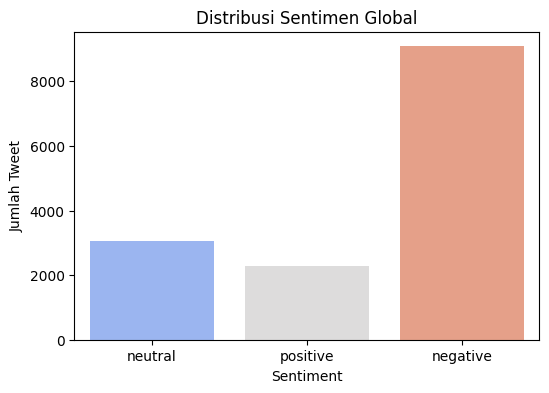

In [ ]:
# Distribusi Sentimen Global
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="airline_sentiment", palette="coolwarm")
plt.title("Distribusi Sentimen Global")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Tweet")
plt.show()

##Insight
Sentimen Negative mendominasi hasil sentimen, seperti yang kita ketahui juga twitter tempat orang menyuarakan keluhan daripada pujian

#Distribusi Sentimen per Maskapai

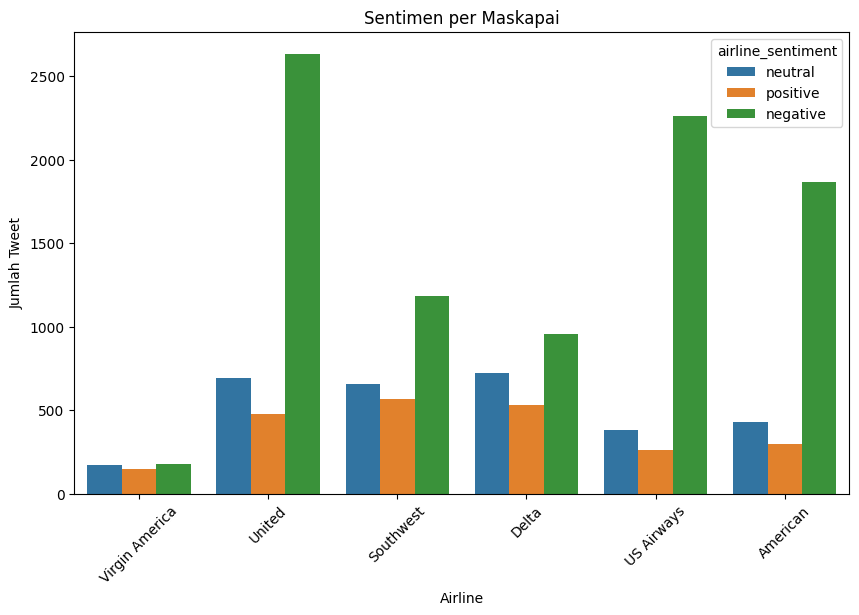

In [ ]:
# Distribusi Sentimen per Maskapai
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="airline", hue="airline_sentiment")
plt.title("Sentimen per Maskapai")
plt.xlabel("Airline")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=45)
plt.show()

##Insight
Dari hasil diatas dapat dilihat bahwa maskapai United, US Airways, dan American memiliki sentimen negatif tertinggi yang tidak sebanding dengan nilai sentimen positif dan netral dari tweet di twitter. perlunya ada evaluasi besar-besaran mengenai kualitas pelayanan, ketepatan waktu berangkat dan lainnya untuk mengurangi sentimen negatif, apalagi ini bersifat publik yang dapat mempegaruhi revenue maskapai. orang" bakal mempertimbangkan untuk membeli maskapai tersebut jika tidak ada evaluasi kedepannya.


#Top 10 Alasan Keluhan

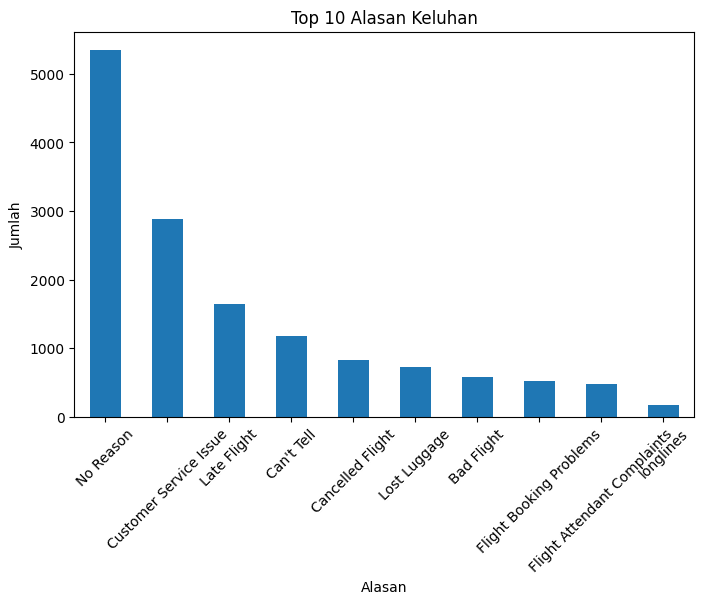

In [ ]:
#Top 10 Alasan Keluhan
keluhan = df["negativereason_filled"].value_counts().head(10)

plt.figure(figsize=(8,5))
keluhan.plot(kind="bar")
plt.title("Top 10 Alasan Keluhan")
plt.xlabel("Alasan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

##Insight
Dari hasil bar chart diatas dapat diketahui sebagaian besar tidak memberikan alasan yang jelas tentang keluhan mereka, namun dapat dilihat juga bahwa customer servicce issue dan late flight jadi salah satu keluhan tertinggi yang diberikan untuk maskapai, semua maskapai yang ada di dataset juga perlu untuk mendengarkan keluhan-keluhan yang diketahui agar dapat menaikan public sentimen positif untuk menaikkan revenue

#Keluhan berdasarkan Maskapai

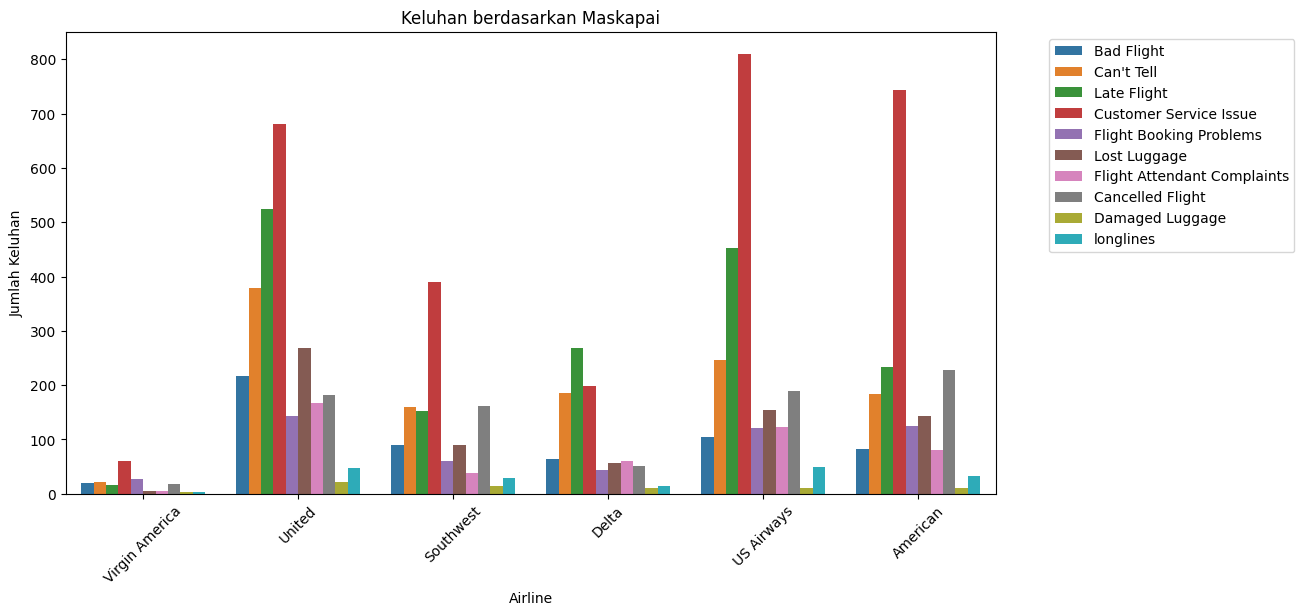

In [ ]:
#Keluhan berdasarkan maskapai
plt.figure(figsize=(12,6))
sns.countplot(data=df[df["negativereason_filled"]!="No Reason"],
              x="airline",
              hue="negativereason_filled")

plt.title("Keluhan berdasarkan Maskapai")
plt.xlabel("Airline")
plt.ylabel("Jumlah Keluhan")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

##Insight
Sebagian besar keluhan yang diterima setiap maskapai adalah Customer Service Issue, namun ada 1 maskapai yang dapat dihighlight memiliki keluhan tertinggi yang berbeda dari maskapai lain.

Maskapai yang saya maksud adalah maskapai Delta yang memiliki keluhan tertinggi di keterlambatan penerbangan (Late Flight)

#Tren Tweet berdasarkan jam

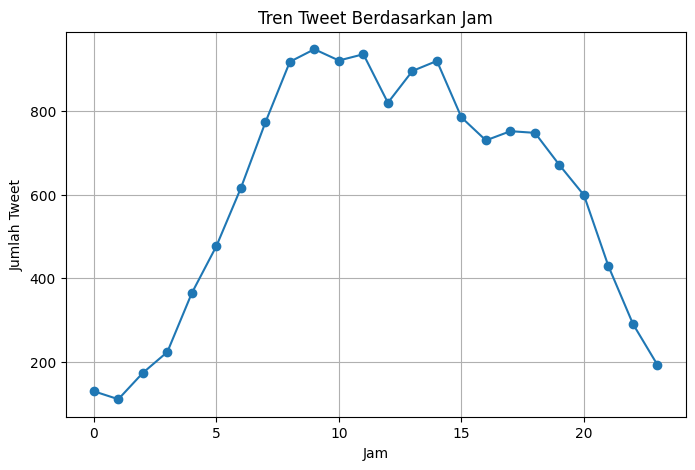

In [ ]:
# Tren Tweet berdasarkan jam
hourly = df.groupby("hour").size()

plt.figure(figsize=(8,5))
hourly.plot(kind="line", marker="o")
plt.title("Tren Tweet Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Tweet")
plt.grid(True)
plt.show()

##Insight
Tweet keluhan biasanya naik di jam 6–11 pagi dan 2–7 malam (jam terbang padat) ini memvalidasi data ini kebanyakan orang yang mengalami keluhan, biasanya langsung tweet saat itu juga. mengingat kebanyakan keluhan dari customer service dan late flight, pihak maskapai harus berbenah lebih, dan memperhatikan jam-jam tersebut untuk memenuhi ekspetasi customer

#Panjang Teks vs Sentimen

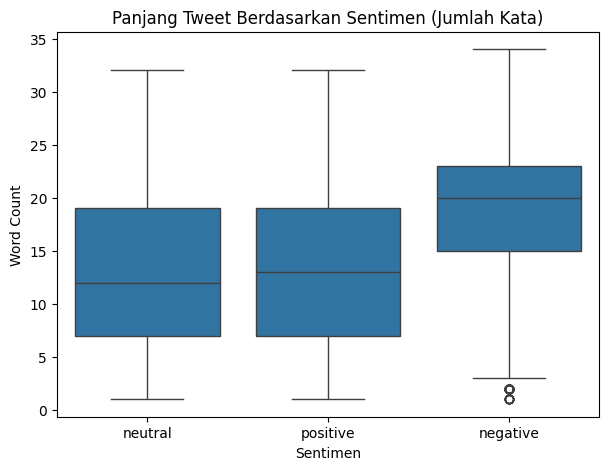

In [ ]:
#Panjang Teks vs Sentimen
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="airline_sentiment", y="word_count")
plt.title("Panjang Tweet Berdasarkan Sentimen (Jumlah Kata)")
plt.xlabel("Sentimen")
plt.ylabel("Word Count")
plt.show()

##Insight
- Dapat dilihat bahwa tweet negatif sering lebih panjang (Keluhan Detail)
- Dapat dilihat juga bahwa tweet positif sering lebih pendek (Pujian Singkat) bahkan jika dilihat keseluruhan by psikological, manusia lebih sering menyimpan pujian di pikiran mereka daripada mengutarakan di sosial media.  

#Kata yang paling sering muncul

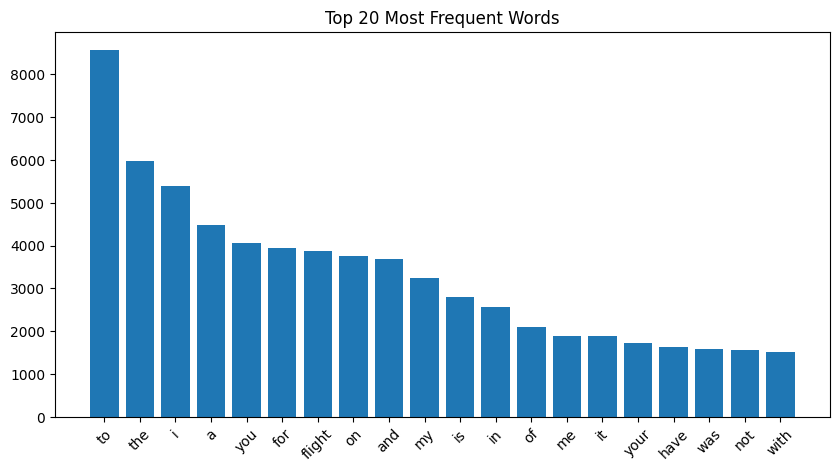

In [ ]:
#Kata yang paling sering muncul
all_words = " ".join(df["clean_text"]).split()
word_freq = Counter(all_words).most_common(20)

words, counts = zip(*word_freq)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()

karena hasil masih lebih ke kata penghubung, kita pisahkan terlebih dahulu


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NOTED: Saya membuat kolom baru untuk keperluan analisis agar bisa memahami konteks kalimat

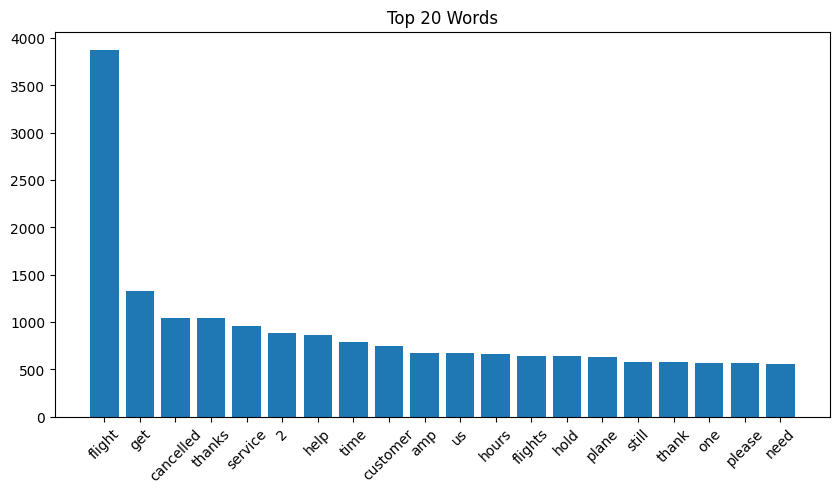

In [ ]:
from collections import Counter

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df["clean_no_stopwords"] = df["clean_text"].apply(remove_stopwords)

all_words = " ".join(df["clean_no_stopwords"]).split()
word_freq = Counter(all_words).most_common(20)

words, counts = zip(*word_freq)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 20 Words")
plt.xticks(rotation=45)
plt.show()

## Insight
Chart diatas adalah keseluruhan kata yang sering muncul di tweet

#Negative Words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-2699446133.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_tweets["clean_negative"] = neg_tweets["clean_text"].apply(remove_all_stopwords)


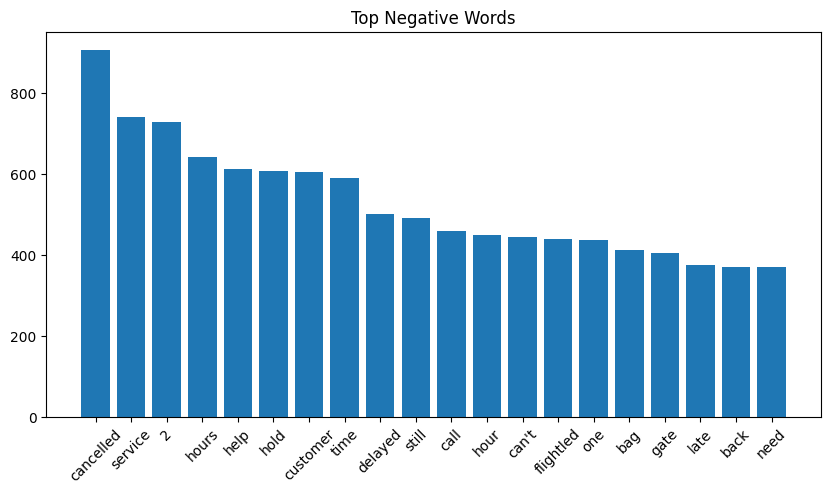

In [ ]:
neg_tweets = df[df["airline_sentiment"] == "negative"]
domain_stopwords = {
    "flight","flights","plane","airline","airlines","american","delta",
    "united","jetblue","southwest","virgin","america",
    "usairways","us","amp","rt", "get"
}

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
stop_words = stop_words.union(domain_stopwords)

def remove_all_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

neg_tweets["clean_negative"] = neg_tweets["clean_text"].apply(remove_all_stopwords)

all_neg_words = " ".join(neg_tweets["clean_negative"]).split()
word_freq_neg = Counter(all_neg_words).most_common(20)

words, counts = zip(*word_freq_neg)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top Negative Words")
plt.xticks(rotation=45)
plt.show()

##Insight
Dapat dilihat diatas ada cukup banyak kata cancelled, dan delay yang sering muncul di tweet

#Positive Words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-3430868050.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_tweets["Clean_positif"] = pos_tweets["clean_text"].apply(remove_all_stopwords)


Text(0.5, 1.0, 'Top Positif Words')

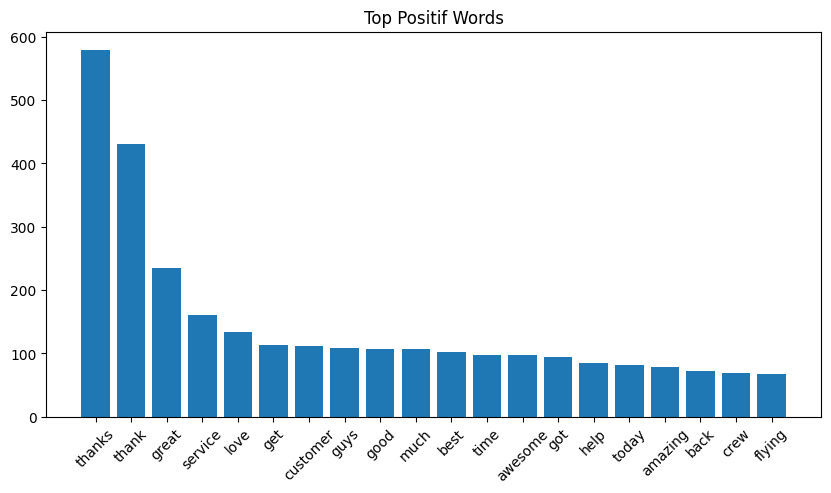

In [ ]:
pos_tweets = df[df["airline_sentiment"] == "positive"]
domain_stopwords = {
    "flight","flights","plane","airline","airlines","american","delta",
    "united","jetblue","southwest","virgin","america",
    "usairways","us","amp","rt"
}
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
stop_words = stop_words.union(domain_stopwords)

def remove_all_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

pos_tweets["Clean_positif"] = pos_tweets["clean_text"].apply(remove_all_stopwords)

all_pos_words = ' '.join(pos_tweets['Clean_positif']).split()
word_freq_pos = Counter(all_pos_words).most_common(20)

words, counts = zip(*word_freq_pos)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top Positif Words")

##Insight
Dapat dilihat diatas bahwa banyak kata thanks, great, love, good dan lainnya yang mengindikasi sentimen positive di tweet

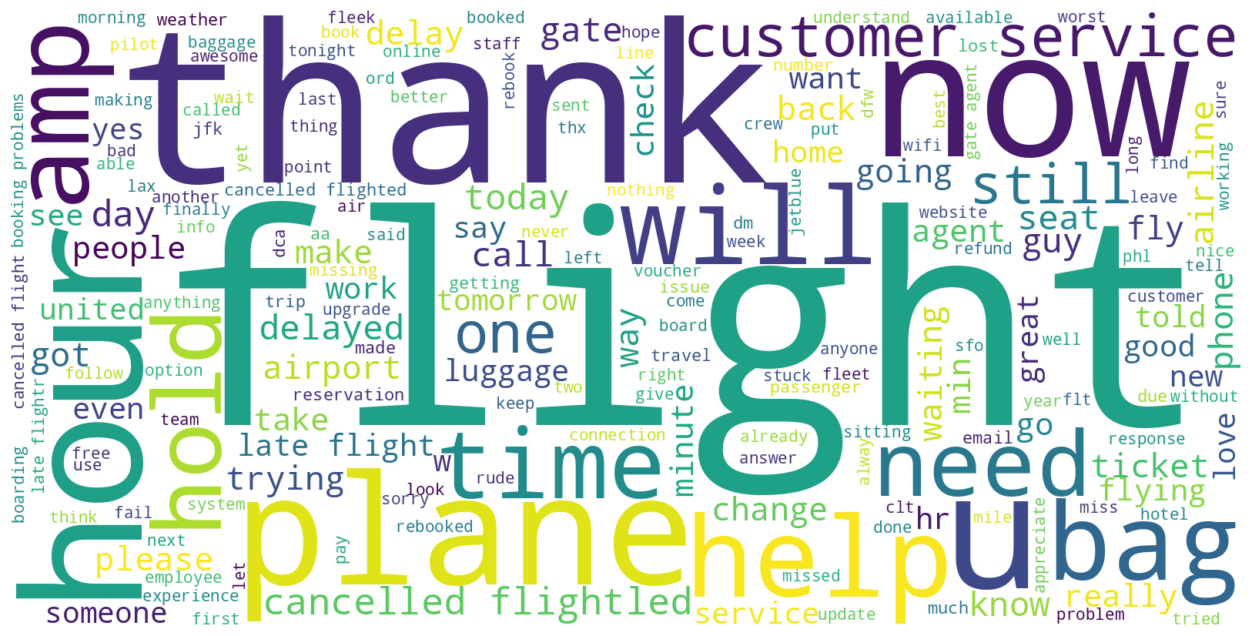

In [ ]:
#Word Cloud kata yang sering muncul
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["clean_text"].astype(str).tolist())

wc = WordCloud(width=1600,
               height=800,
               background_color="white",
               max_words=200).generate(text)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.savefig("wordcloud_all.png", dpi=300)


In [ ]:
custom_stopwords = {
    # kata kerja umum
    "get", "got", "getting", "make", "made", "making",
    "go", "going", "went", "come", "coming", "take", "taking",
    "use", "using", "used", "good"

    # kata waktu & kuantitas
    "time", "day", "days", "hour", "hours", "week",

    # kata informal / conversational
    "im", "ive", "id", "dont", "cant", "wont", "couldnt",
    "would", "should", "really", "just", "still", "thank",

    # kata umum lain
    "one", "two", "also", "back", "even", "please", "flight"
}

from wordcloud import STOPWORDS
from nltk.corpus import stopwords

stop_words = set(STOPWORDS)
stop_words.update(stopwords.words("english"))
stop_words.update(custom_stopwords)


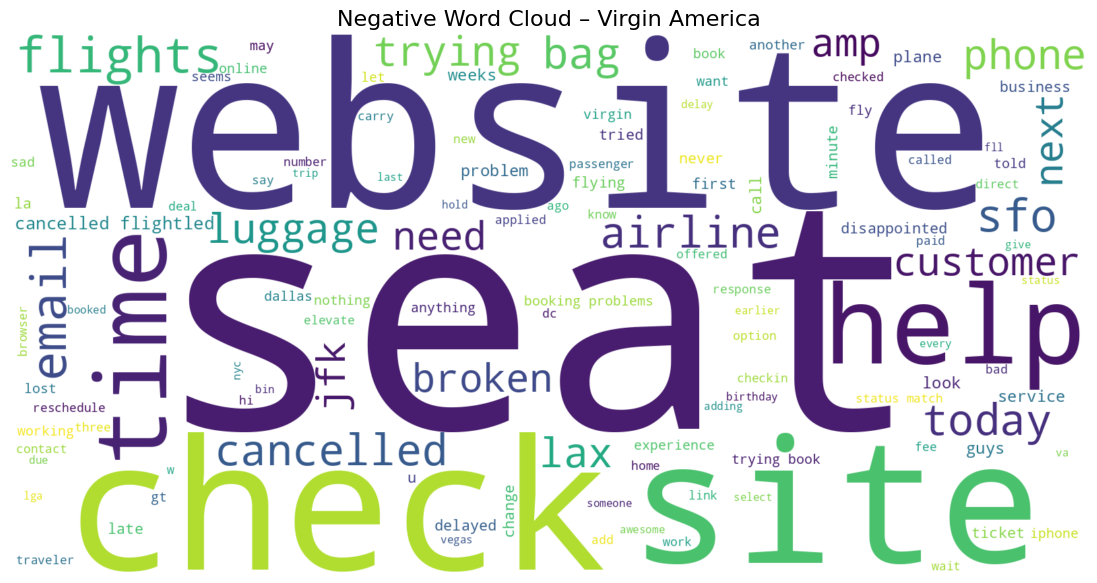

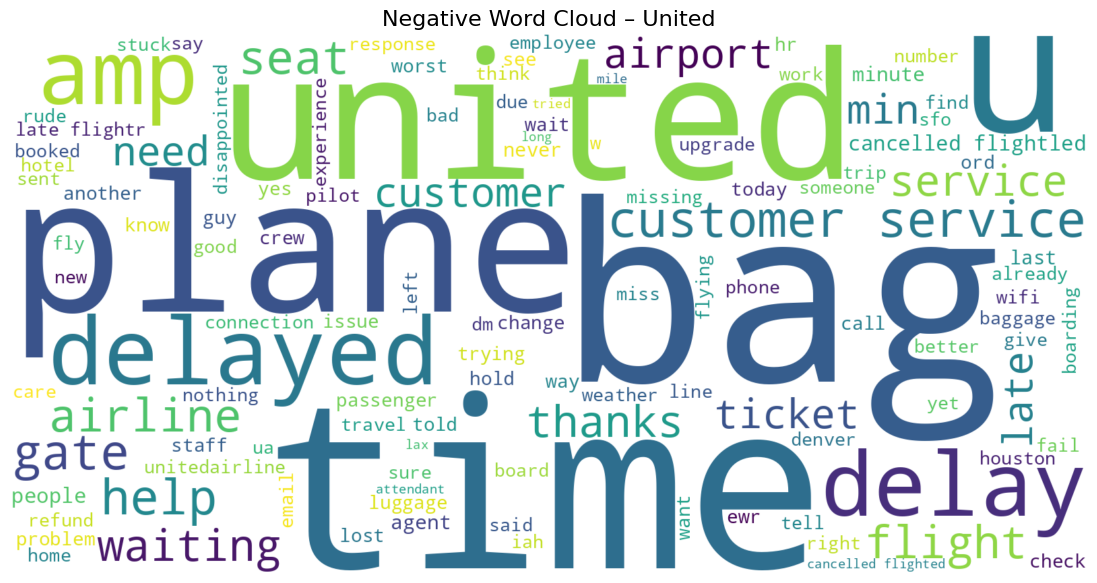

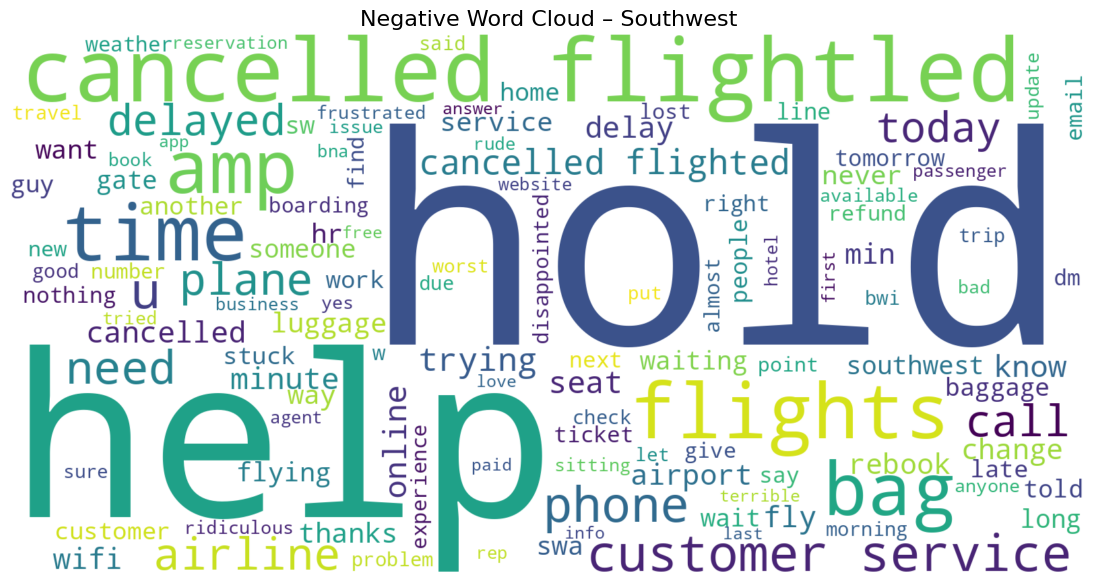

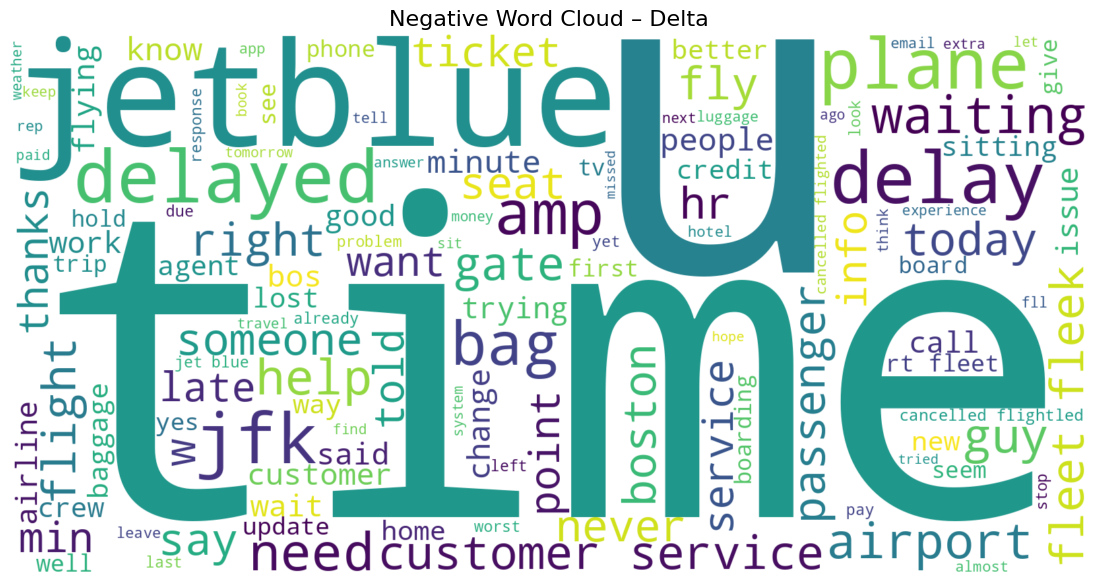

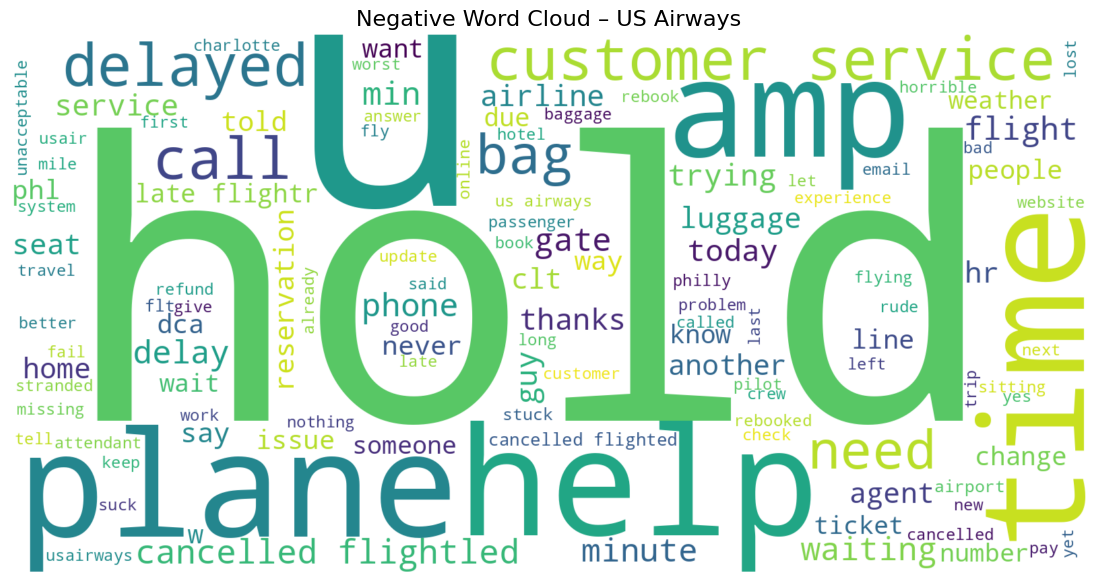

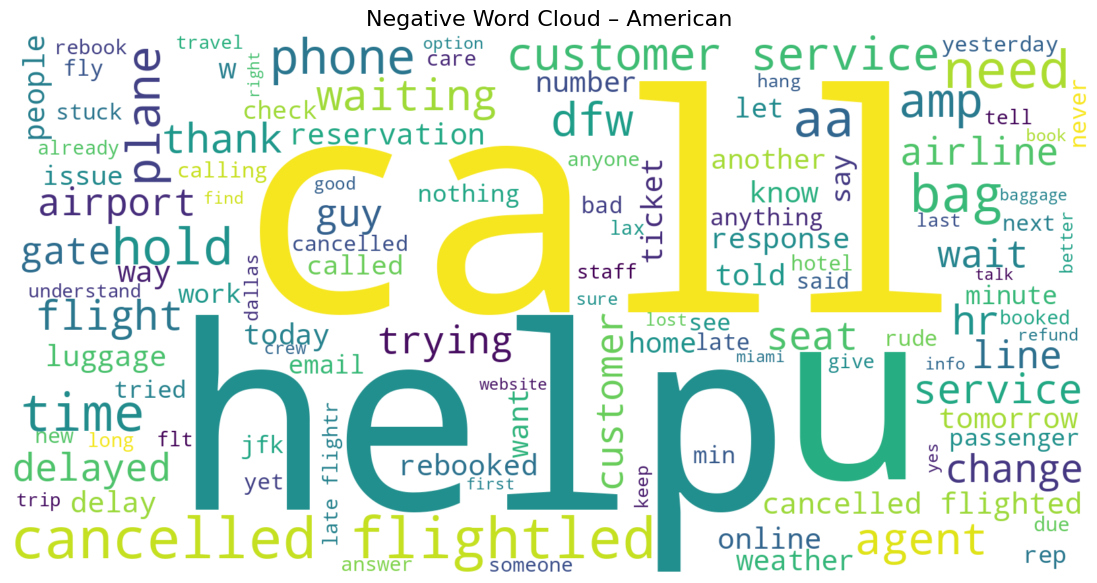

In [ ]:
airlines = df["airline"].unique()

for airline in airlines:
    neg_airline = df[
        (df["airline_sentiment"] == "negative") &
        (df["airline"] == airline)
    ].copy()

    if neg_airline.empty:
        continue

    neg_airline["clean_negative"] = neg_airline["clean_text"].apply(remove_all_stopwords)

    text_wc = " ".join(neg_airline["clean_negative"])

    wc = WordCloud(
        width=1600,
        height=800,
        background_color="white",
        max_words=120
    ).generate(text_wc)

    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Negative Word Cloud – {airline}", fontsize=16)

    plt.savefig(f"wordcloud_negative_{airline}.png", dpi=300, bbox_inches="tight")
    plt.show()


In [ ]:
df.to_csv('Sentimen Airline.csv', index=False)